# Using binomial distribution to predict year when each region will get a peak of internet access penetration rate (99%)

In [96]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


import warnings
warnings.filterwarnings('ignore')

# Import statistics packages from SciPy
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import pearsonr

#importing ticker amd grid for plots
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

In [97]:
#loading file with necessary data (created in ML Classification jupiter notebook )
df_f = pd.read_csv("stat.csv")
df_f.head()

,Year,Region,Estimated Population nr,Nr of Persons with Internet Access,% of Persons with Internet Access
0,2011,Border,784000.0,517440.0,66.0
1,2011,Dublin,2523000.0,2119320.0,84.0
2,2011,Ireland,9149700.0,7136766.0,78.0
3,2011,Mid-East,1314900.0,1143963.0,87.0
4,2011,Mid-West,933600.0,718872.0,77.0


In [98]:
#Checking available years, mean value foe all years(historical and predicted)
df_f.describe(include='all')

,Year,Region,Estimated Population nr,Nr of Persons with Internet Access,% of Persons with Internet Access
count,153.000000,153,1.530000e+02,1.530000e+02,153.000000
unique,NaN,9,NaN,NaN,NaN
top,NaN,Border,NaN,NaN,NaN
freq,NaN,17,NaN,NaN,NaN
mean,2019.000000,NaN,2.201954e+06,1.993066e+06,89.241023
std,4.915068,NaN,2.809968e+06,2.580091e+06,7.604403
min,2011.000000,NaN,5.676000e+05,4.248340e+05,66.000000
25%,2015.000000,NaN,8.433529e+05,7.205340e+05,85.000000
50%,2019.000000,NaN,9.958000e+05,9.309599e+05,89.500000
75%,2023.000000,NaN,1.550029e+06,1.515348e+06,95.307526


In [99]:
#creating list with unique region names
unique_region_names = df_f.Region.unique()
unique_region_names

array(['Border', 'Dublin', 'Ireland', 'Mid-East', 'Mid-West', 'Midlands',
       'South-East', 'South-West', 'West'], dtype=object)

In [100]:
#filtering data frame to have only necessary data
df_filter = pd.DataFrame(df_f,columns=['Year','Region','Estimated Population nr'])

In [101]:
# calculate a field with 99% of population for each year
df_filter['99 % of Persons with Internet Access'] = df_filter['Estimated Population nr']*0.99

In [102]:

#checking the data frame
df_filter 

,Year,Region,Estimated Population nr,99 % of Persons with Internet Access
0,2011,Border,784000.00,7.761600e+05
1,2011,Dublin,2523000.00,2.497770e+06
2,2011,Ireland,9149700.00,9.058203e+06
3,2011,Mid-East,1314900.00,1.301751e+06
4,2011,Mid-West,933600.00,9.242640e+05
...,...,...,...,...
148,2023,Border,828976.47,8.206867e+05
149,2024,Border,832570.59,8.242449e+05
150,2025,Border,836164.71,8.278031e+05
151,2026,Border,839758.82,8.313612e+05


In [103]:
#function for binomial probability calculation
def binomial_probability(n, p, k):
    return binom.pmf(k, n, p)

#function to calculate last year when probability 
def probability_of_greater_than_or_less_than(n, p, k):
    
    # Calculate the probability of getting k or fewer successes.
    p_less_than_or_equal_to_k = binomial_probability(n, p, k)
    
    # Calculate the probability of getting greater than k successes.
    p_greater_than_k = 1 - p_less_than_or_equal_to_k
    
    return p_greater_than_k
data=[]
for region in unique_region_names:
    df = df_f.drop(df_f[(df_f["Region"] != region) ].index)
    for year in df["Year"][:-1]:
        n = round(df.loc[(df.Year == year) & (df.Region == region),'Estimated Population nr'].iloc[0])
        p1 = df.loc[(df.Year == year+1) & (df.Region == region),'% of Persons with Internet Access'].iloc[0]
        p = round(p1/100,2)
        k = round(df_filter.loc[(df_filter.Year == year) & (df_filter.Region == region),
                                '99 % of Persons with Internet Access'].iloc[0])
        probability = probability_of_greater_than_or_less_than(n, p, k)
        binomial = binomial_probability(n, p, k)
        if p >=0.99:
            row = [year, region, binomial,probability]
            data.append(row)
            break              

In [104]:
binomial99 = pd.DataFrame(data,columns=['Year','Region','Binomial Distribution','99% or more'])

In [105]:
binomial99

,Year,Region,Binomial Distribution,99% or more
0,2023,Border,0.004404,0.995596
1,2023,Dublin,0.002333,0.997667
2,2025,Ireland,0.001233,0.998767
3,2026,Mid-West,0.003949,0.996051
4,2025,Midlands,0.004960,0.995040
5,2025,South-East,0.004152,0.995848
6,2025,South-West,0.003261,0.996739


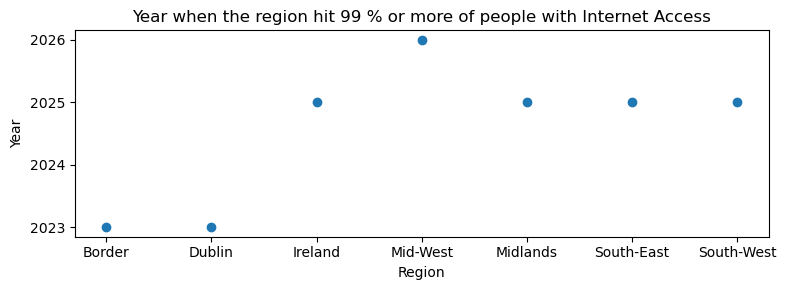

In [106]:
fig = plt.figure(figsize=(8, 3))
# Create a line plot
plt.scatter(binomial99['Region'], binomial99['Year'],label="Region")

#plt.annotate(df.Region[])

# Get the lists of years, region names, and percents
years = binomial99["Year"].tolist()
region_names = binomial99["Region"].tolist()
percents = binomial99["99% or more"].tolist()

# Loop through the data and add an annotation for each data point
for i in range(len(years)):
    plt.annotate(region_names[i], (years[i], percents[i]), xytext=(10, 0), textcoords='offset points')

# Set the x-axis and y-axis labels
plt.xlabel("Region")
plt.ylabel("Year")
plt.yticks(range(2023, 2027))

# Set the title of the graph
plt.title("Year when the region hit 99 % or more of people with Internet Access")

fig.tight_layout()

# Show the plot
plt.show()